### Dataset Description
The data provided in this Github link is the fuel quality data from the Federal Energy Regulatory Commission which is provided by the United States Energy Information Administration. The data consists of the following columns:

- record_id​ : unique id given to identify each record
- utility_id_ferc1​ : id given by the Federal Energy Regulatory Commission to each utility. (Numbers seem arbitrary.)
- report_year​ : The year the record was given.
- -plant_name_ferc1​ : name of the energy plant/station. When analysing data involving this feature, be careful of possible mistakes in spelling. For example, `respondent’s portion` and `resondent’s portion` are the same energy plants, but the latter has a spelling error (the ‘p’ is missing). Be careful not to treat this as two different plants. There are also some other edge cases you might want to consider. This should be part of the Data cleaning phase.--
- fuel_type_code_pudl​ : the type of fuel (i.e coal, gas, nuclear, oil).
- fuel_unit​ : the unit of fuel. This would typically be related to the fuel_type_code_pudl` feature, as the coal fuel type would be measured in ton; the gas fuel type in mcf, etc. It’s worth doing more research on what each one means.
- fuel_qty_burned​ : the quantity of fuel burned.
- fuel_mmbtu_per_unit​: the measure of energy per unit. The metric being used here is the one million British Thermal Units (MMBTU), which is the measure of energy content across most industries. This feature measures the MMBTU per unit.
- fuel_cost_per_unit_burned​ : the fuel cost per unit burned. This is the cost of burning one unit of `fuel_qty_burned`.
- fuel_cost_per_unit_delivered​ : the cost of fuel delivered per unit. This is the cost of delivering one unit of fuel. (Note: there is no feature indicating the amount of fuel quantity delivered in this dataset.)
- fuel_cost_per_mmbtu​ : the cost of fuel per mmbtu. This is the cost of one `fuel_mmbtu_per_unit`.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
%matplotlib inline

# Question 1
    If you’re given two lists:

    A = [1,2,3,4,5,6], B = [13, 21, 34]

The task is to create a list with the elements of A and B in a single dimension with output:

A_B =  [1,2,3,4,5,6,13, 21, 34] 

Which of the following option is the best way to create this list?

In [3]:
A = [1,2,3,4,5,6]
B = [13, 21, 34]
A.extend(B)
A

[1, 2, 3, 4, 5, 6, 13, 21, 34]

# Question 2
How do you create an identity matrix in python?

In [8]:
np.identity(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [9]:
df = pd.read_csv('Fuel.csv')

In [10]:
df.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


In [11]:
df.tail()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
29518,f1_fuel_2018_12_12_0_13,12,2018,neil simpson ct #1,gas,mcf,18799.0,1.059,4.78,4.78,9.03
29519,f1_fuel_2018_12_12_1_1,12,2018,cheyenne prairie 58%,gas,mcf,806730.0,1.050,3.65,3.65,6.95
29520,f1_fuel_2018_12_12_1_10,12,2018,lange ct facility,gas,mcf,104554.0,1.060,4.77,4.77,8.99
29521,f1_fuel_2018_12_12_1_13,12,2018,wygen 3 bhp 52%,coal,ton,315945.0,16.108,3.06,14.76,1.11
29522,f1_fuel_2018_12_12_1_14,12,2018,wygen 3 bhp 52%,gas,mcf,17853.0,1.059,0.00,0.00,11.68


In [12]:
df.describe()

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523.000000,29523.000000,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
mean,118.601836,2005.806050,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,74.178353,7.025483,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,1.000000,1994.000000,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,55.000000,2000.000000,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,122.000000,2006.000000,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,176.000000,2012.000000,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000
max,514.000000,2018.000000,5.558942e+08,341.260000,139358.000000,7.964521e+06,359278.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29523 entries, 0 to 29522
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   record_id                     29523 non-null  object 
 1   utility_id_ferc1              29523 non-null  int64  
 2   report_year                   29523 non-null  int64  
 3   plant_name_ferc1              29523 non-null  object 
 4   fuel_type_code_pudl           29523 non-null  object 
 5   fuel_unit                     29343 non-null  object 
 6   fuel_qty_burned               29523 non-null  float64
 7   fuel_mmbtu_per_unit           29523 non-null  float64
 8   fuel_cost_per_unit_burned     29523 non-null  float64
 9   fuel_cost_per_unit_delivered  29523 non-null  float64
 10  fuel_cost_per_mmbtu           29523 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 2.5+ MB


In [14]:
df.columns

Index(['record_id', 'utility_id_ferc1', 'report_year', 'plant_name_ferc1',
       'fuel_type_code_pudl', 'fuel_unit', 'fuel_qty_burned',
       'fuel_mmbtu_per_unit', 'fuel_cost_per_unit_burned',
       'fuel_cost_per_unit_delivered', 'fuel_cost_per_mmbtu'],
      dtype='object')

In [15]:
df.duplicated().any()

False

# Question 3
Which of the following fuel type code has the lowest average fuel cost per unit burned?

In [16]:
df['fuel_type_code_pudl'].unique()

array(['coal', 'gas', 'nuclear', 'oil', 'waste', 'other'], dtype=object)

In [17]:
df.groupby(['fuel_type_code_pudl']).mean()

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
fuel_type_code_pudl,,,,,,,
coal,115.637534,2004.623143,1.903473e+06,20.762780,67.421830,116.951141,1.787190
gas,124.122062,2005.978060,4.843183e+06,1.021913,13.659397,12.095172,5.408876
nuclear,107.397311,2002.970660,5.454838e+06,17.582120,4955.157002,28616.915039,1.716559
oil,113.236235,2007.195933,6.311677e+04,5.814377,168.877086,313.907691,12.698732
other,110.467066,2001.700599,2.948137e+06,0.572752,18.253856,16.871485,155.084910
waste,154.253968,2005.650794,1.171914e+05,0.341163,19.518122,18.413052,822.709937


# Question 4
What is the standard deviation and 75th percentile of the measure of energy per unit (Fuel_mmbtu_per_unit) in two decimal places?



In [20]:
np.around(df.describe(),2)

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523.00,29523.00,2.952300e+04,29523.00,29523.00,29523.00,29523.00
mean,118.60,2005.81,2.622119e+06,8.49,208.65,917.57,19.30
std,74.18,7.03,9.118004e+06,10.60,2854.49,68775.93,2091.54
min,1.00,1994.00,1.000000e+00,0.00,-276.08,-874.94,-41.50
25%,55.00,2000.00,1.381700e+04,1.02,5.21,3.78,1.94
50%,122.00,2006.00,2.533220e+05,5.76,26.00,17.37,4.13
75%,176.00,2012.00,1.424034e+06,17.01,47.11,42.14,7.74
max,514.00,2018.00,5.558942e+08,341.26,139358.00,7964521.00,359278.00


# Question 5
What is the skewness and kurtosis for the fuel quantity burned in two decimal places?


In [21]:
df['fuel_qty_burned'].describe()

count    2.952300e+04
mean     2.622119e+06
std      9.118004e+06
min      1.000000e+00
25%      1.381700e+04
50%      2.533220e+05
75%      1.424034e+06
max      5.558942e+08
Name: fuel_qty_burned, dtype: float64

In [22]:
round(df['fuel_qty_burned'].skew(),2)

15.85

In [23]:
round(df['fuel_qty_burned'].kurtosis(),2)

651.37

# Question 6
Which feature has missing values and what is the total number of missing value and percentage of the missing rows as a factor of the total number of rows in three decimal places? 

(Enter answer in the format: Feature: xxx, Total: xxx, Percent: xxx)


In [26]:
df['fuel_unit'].isnull().sum()

180

In [27]:
len(df['fuel_unit'])

29523

In [28]:
round(df['fuel_unit'].isnull().sum()/len(df['fuel_unit']), 3)

0.006

In [29]:
def get_missing_percentage(x):
    num = x.isnull().sum()
    length = len(x)
    result = round(num/length, 3)
    return result

In [30]:
get_missing_percentage(df['fuel_unit'])

0.006

# Question 7
The feature with missing values falls under what category? What missing value imputation technique would you use?

- Categorical and Mode

In [32]:
df['fuel_unit'].replace(np.nan,'mcf', inplace=True)

# Question 8
Which of the features has the second and third lowest correlation with the Fuel Cost Per Unit Burned?
- fuel_qty_burned
- fuel_mmbtu_per_unit



In [33]:
corrmat = df.corr()
corrmat

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
utility_id_ferc1,1.000000,0.093323,-0.057447,-0.066946,-0.037863,-0.016414,0.006122
report_year,0.093323,1.000000,0.012952,-0.110853,0.013599,-0.014043,0.010261
fuel_qty_burned,-0.057447,0.012952,1.000000,-0.080946,-0.018535,-0.003551,-0.001896
fuel_mmbtu_per_unit,-0.066946,-0.110853,-0.080946,1.000000,-0.010034,-0.009039,-0.005884
fuel_cost_per_unit_burned,-0.037863,0.013599,-0.018535,-0.010034,1.000000,0.011007,-0.000437
fuel_cost_per_unit_delivered,-0.016414,-0.014043,-0.003551,-0.009039,0.011007,1.000000,-0.000109
fuel_cost_per_mmbtu,0.006122,0.010261,-0.001896,-0.005884,-0.000437,-0.000109,1.000000


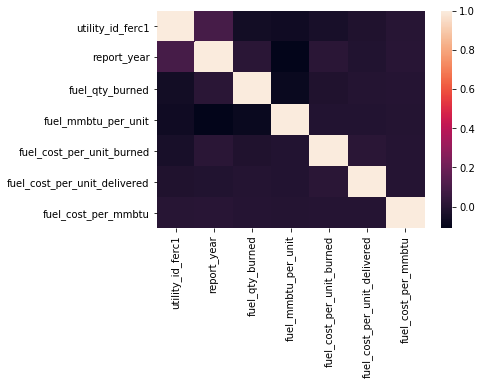

In [34]:
sns.heatmap(corrmat);

# Question 9
For the fuel type coal, what is the percentage change in the fuel cost per unit burned in 1998 compared to 1994?


In [36]:
def get_percentage(x):
    sumnum = x.sum()
    lennum = len(x)
    result = round(sumnum/lennum, 3)
    return result

In [37]:
ninetyfour = df[(df['fuel_type_code_pudl'] == 'coal') & (df['report_year'] == 1994)]

In [38]:
ninetyfour.loc[:,['fuel_cost_per_unit_burned']]

,fuel_cost_per_unit_burned
0,18.59
1,18.58
2,39.72
3,47.21
5,44.24
...,...
1224,37.78
1227,38.23
1229,40.97
1230,39.95


In [39]:
ninetyfourperc= ninetyfour.loc[:,['fuel_cost_per_unit_burned']]

In [40]:
get_percentage(ninetyfourperc)

fuel_cost_per_unit_burned    31.546
dtype: float64

### Just Cross Checking if the function is performing correctly

In [42]:
ninetyfoursum= ninetyfour.loc[:,['fuel_cost_per_unit_burned']].sum()
ninetyfourlen= ninetyfour.loc[:,['fuel_cost_per_unit_burned']]
ninetyfourlen= len(ninetyfourlen)
ninetyfoursum/ninetyfourlen

fuel_cost_per_unit_burned    31.546467
dtype: float64

In [43]:
ninetyeight = df[(df['fuel_type_code_pudl'] == 'coal') & (df['report_year'] == 1998)]

In [44]:
ninetyeight.loc[:,['fuel_cost_per_unit_burned']]

,fuel_cost_per_unit_burned
4618,19.282
4619,19.280
4620,26.550
4622,26.550
4624,30.936
...,...
5708,15.151
5710,21.055
5712,22.596
5714,14.035


In [45]:
ninetyeightperc = ninetyeight.loc[:,['fuel_cost_per_unit_burned']]

In [46]:
get_percentage(ninetyeightperc)

fuel_cost_per_unit_burned    27.616
dtype: float64

### Just Cross Checking if the function is performing correctly

In [48]:
ninetyeightsum= ninetyeight.loc[:,['fuel_cost_per_unit_burned']].sum()
ninetyeightlen= ninetyeight.loc[:,['fuel_cost_per_unit_burned']]
ninetyeightlen= len(ninetyeightlen)
ninetyeightsum/ninetyeightlen

fuel_cost_per_unit_burned    27.616234
dtype: float64

In [49]:
percentage_change = get_percentage(ninetyeightperc) - get_percentage(ninetyfourperc)

In [50]:
percentage_change

fuel_cost_per_unit_burned   -3.93
dtype: float64

# Question 10
Which year has the highest average fuel cost per unit delivered?



In [57]:
df.groupby(['report_year']).mean()

,utility_id_ferc1,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
report_year,,,,,,
1994,106.120648,2.724018e+06,10.638098,213.191996,63.636060,3.086977
1995,110.139051,3.712067e+06,10.644830,354.422555,32.735269,2.868838
1996,108.714154,2.544754e+06,10.778041,79.434995,9196.705948,2.695880
1997,108.366545,2.813503e+06,10.247632,149.482132,11140.197239,3.113486
1998,109.845528,3.267453e+06,10.704964,126.683519,287.154420,2.775862
1999,108.222857,3.281281e+06,10.558885,120.053605,25.551627,2.740251
2000,111.083758,2.472032e+06,9.224475,237.797111,985.362877,4.208403
2001,113.521386,2.321402e+06,8.371469,133.013010,60.050396,4.612658
2002,120.354357,2.145645e+06,8.304833,101.179365,47.594361,6.226281


# Thank You